In [134]:
import pandas as pd
import datetime
from pathlib import Path

import os
datadir = Path("../Data/").resolve().absolute()
print(datadir)
currency = "XMRUSD"
# forecasts_by_last_modified = sorted([f for f in datadir.glob("*_training_forecast.csv")], key=os.path.getmtime, reverse=True)
# print(forecasts_by_last_modified)
# currency = forecasts_by_last_modified[0].name.split("_")[0]
today = datetime.datetime.now().strftime("%Y_%m_%d")


C:\Users\karan\source\csharp\Crypto-Price-Forecaster\ForecasterCLI\Data


In [135]:
# Parse main file data into df
from datetime import datetime

dateparse = lambda x: datetime.strptime(x, "%Y-%m-%d")
main_file = datadir / f"{currency}.csv"

maindf = pd.read_csv(main_file, parse_dates=['Date'], date_parser=dateparse)

# Only keep two columns, and reverse the dataset (old to new)
maindf = maindf[["Date", "Last"]][::-1]

print(maindf)


           Date      Last
1774 2016-12-01    9.0275
1773 2016-12-02    8.5982
1772 2016-12-03    8.2119
1771 2016-12-04    8.1000
1770 2016-12-05    7.7600
...         ...       ...
4    2021-11-09  289.0200
3    2021-11-10  266.8900
2    2021-11-11  265.5300
1    2021-11-12  259.2500
0    2021-11-13  270.9400

[1775 rows x 2 columns]


<AxesSubplot:xlabel='Date', ylabel='Last'>

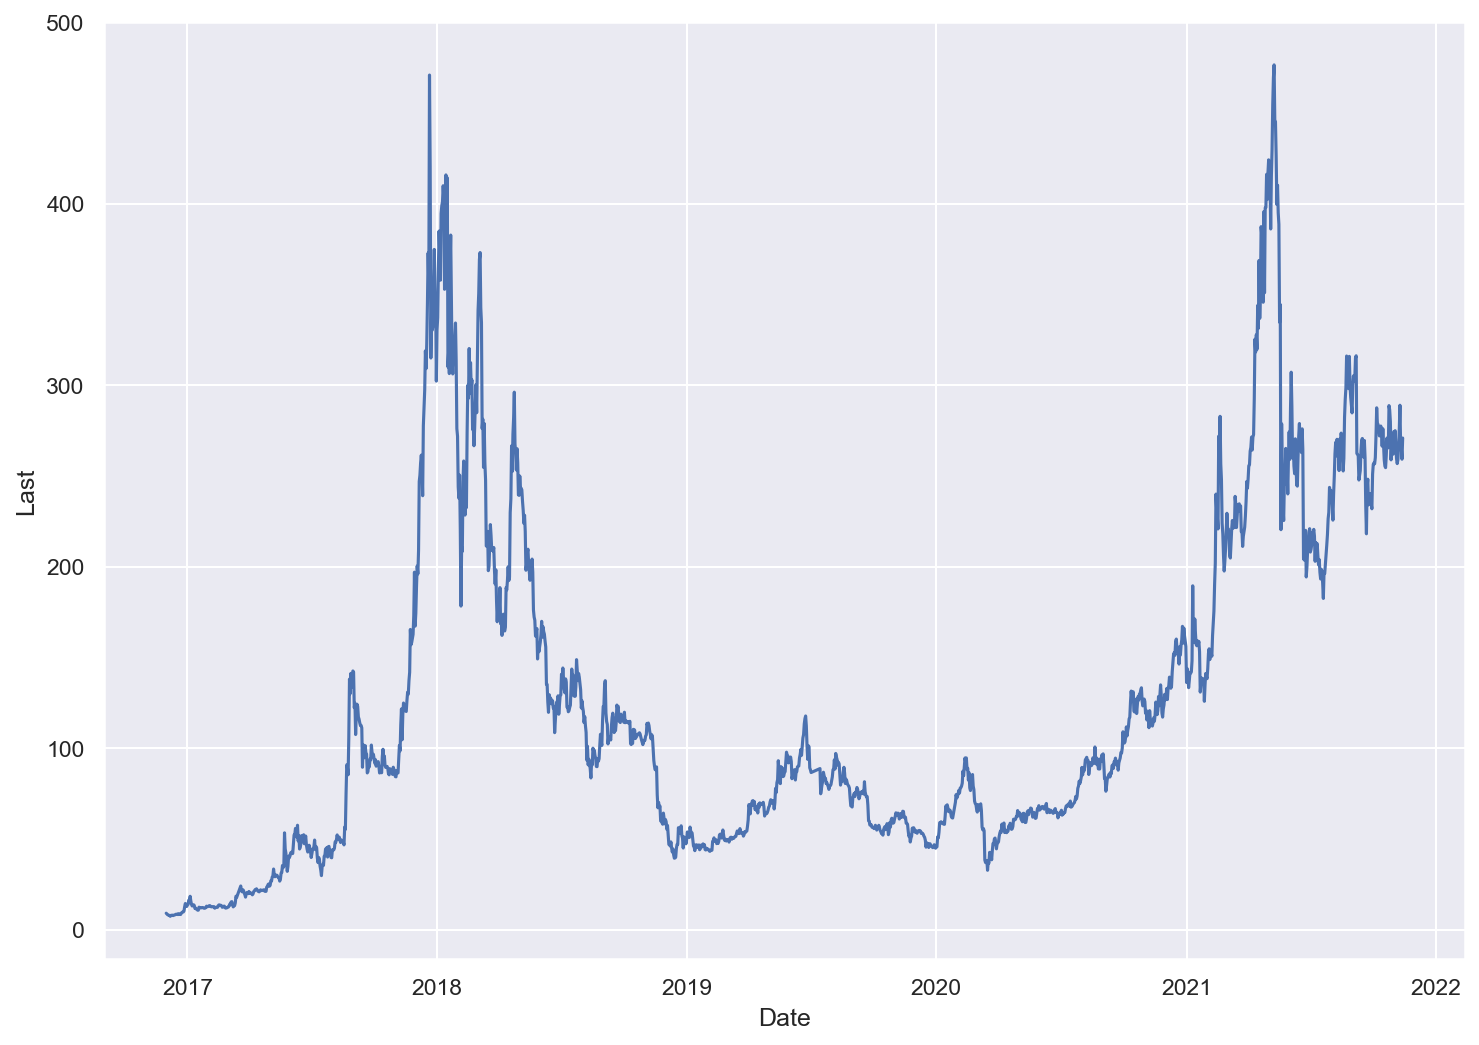

In [136]:
# Plot the main data
import seaborn as sns

from matplotlib import pyplot as plt
import seaborn as sns    

sns.set(rc={'figure.figsize':(11.7,8.27), 'figure.dpi': 150})

sns.lineplot(
    data=maindf, x="Date", y="Last", sort=False
)


In [137]:
testing_split = datadir / f"{currency}_testing_split.csv"
testdf = pd.read_csv(testing_split, parse_dates=['Date'], date_parser=dateparse)
print(testdf)

train_split = datadir / f"{currency}_training_split.csv"
traindf = pd.read_csv(train_split, parse_dates=['Date'], date_parser=dateparse)
print(traindf)


         Date    Last
0  2021-10-31  274.41
1  2021-11-01  271.93
2  2021-11-02  274.99
3  2021-11-03  266.54
4  2021-11-04  259.64
5  2021-11-05  256.84
6  2021-11-06  258.89
7  2021-11-07  266.02
8  2021-11-08  275.02
9  2021-11-09  289.02
10 2021-11-10  266.89
11 2021-11-11  265.53
12 2021-11-12  259.25
13 2021-11-13  270.94
           Date      Last
0    2016-12-01    9.0275
1    2016-12-02    8.5982
2    2016-12-03    8.2119
3    2016-12-04    8.1000
4    2016-12-05    7.7600
...         ...       ...
1770 2021-11-09  289.0200
1771 2021-11-10  266.8900
1772 2021-11-11  265.5300
1773 2021-11-12  259.2500
1774 2021-11-13  270.9400

[1775 rows x 2 columns]


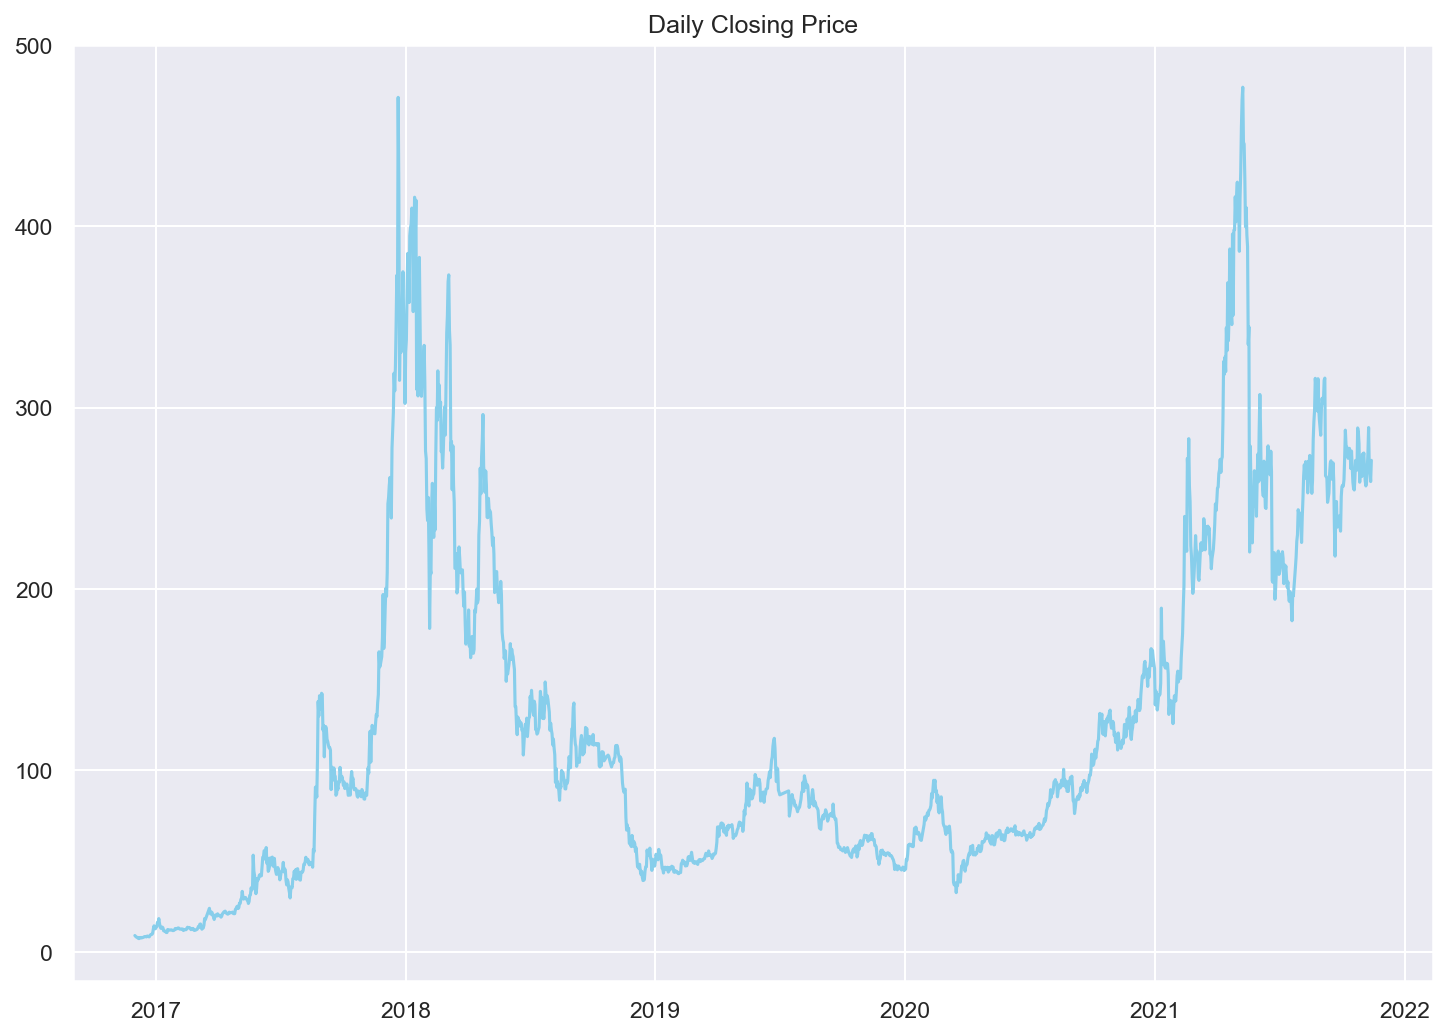

In [138]:

# sns.lineplot(
#     data=traindf, x="Date", y="Last", sort=False
# )

plt.title(f"Daily Closing Price")
plt.plot('Date', 'Last', data=traindf, color="skyblue", label="Closing")
plt.show()

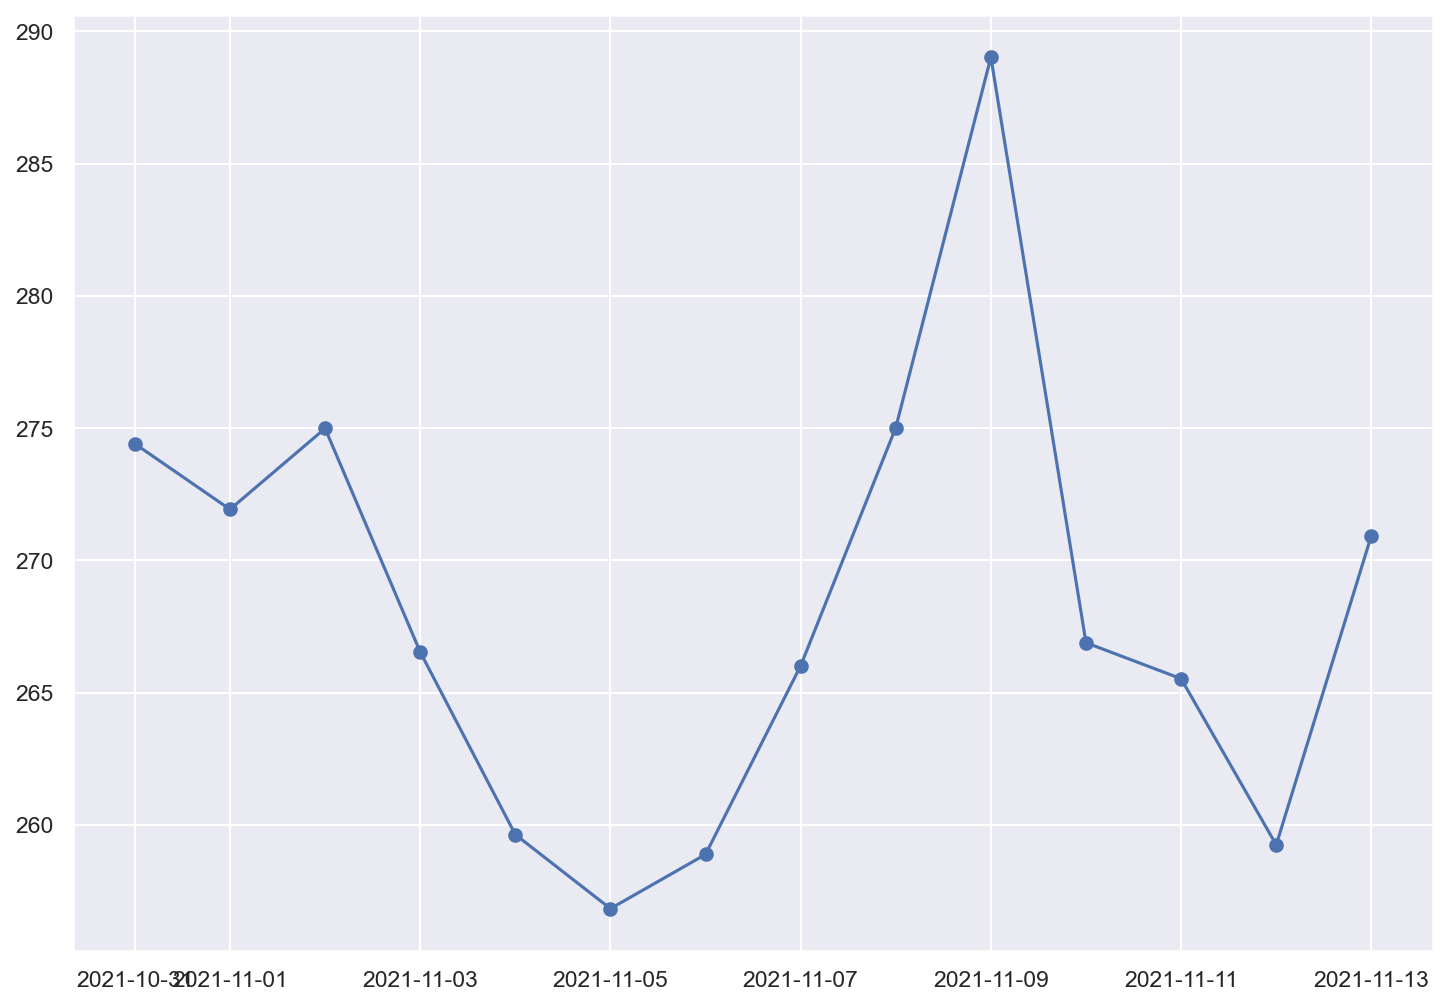

In [139]:
plt.plot(testdf["Date"], testdf["Last"], marker='o')

In [140]:
train_forecast_file = datadir / f"{currency}_training_forecast.csv"
train_fc_df = pd.read_csv(train_forecast_file, parse_dates=['Date'], date_parser=dateparse)
print(train_fc_df)


         Date   Forecast  LowerBound  UpperBound  BoundsDifference
0  2021-10-31  271.15576   258.31305   283.99847         12.842712
1  2021-11-01  268.68220   241.86583   295.49857         26.816368
2  2021-11-02  263.80518   226.57051   301.03986         37.234673
3  2021-11-03  261.42303   215.54437   307.30170         45.878662
4  2021-11-04  261.09970   208.49579   313.70360         52.603912
5  2021-11-05  262.78150   203.42345   322.13956         59.358055
6  2021-11-06  263.02405   196.80138   329.24670         66.222664
7  2021-11-07  265.96540   192.84389   339.08690         73.121513
8  2021-11-08  267.26062   188.11009   346.41116         79.150536
9  2021-11-09  269.55370   185.25220   353.85522         84.301514
10 2021-11-10  268.54290   179.47021   357.61560         89.072693
11 2021-11-11  269.60358   176.25711   362.95004         93.346466
12 2021-11-12  268.08640   170.63196   365.54083         97.454437
13 2021-11-13  267.41763   166.20567   368.62958        101.21

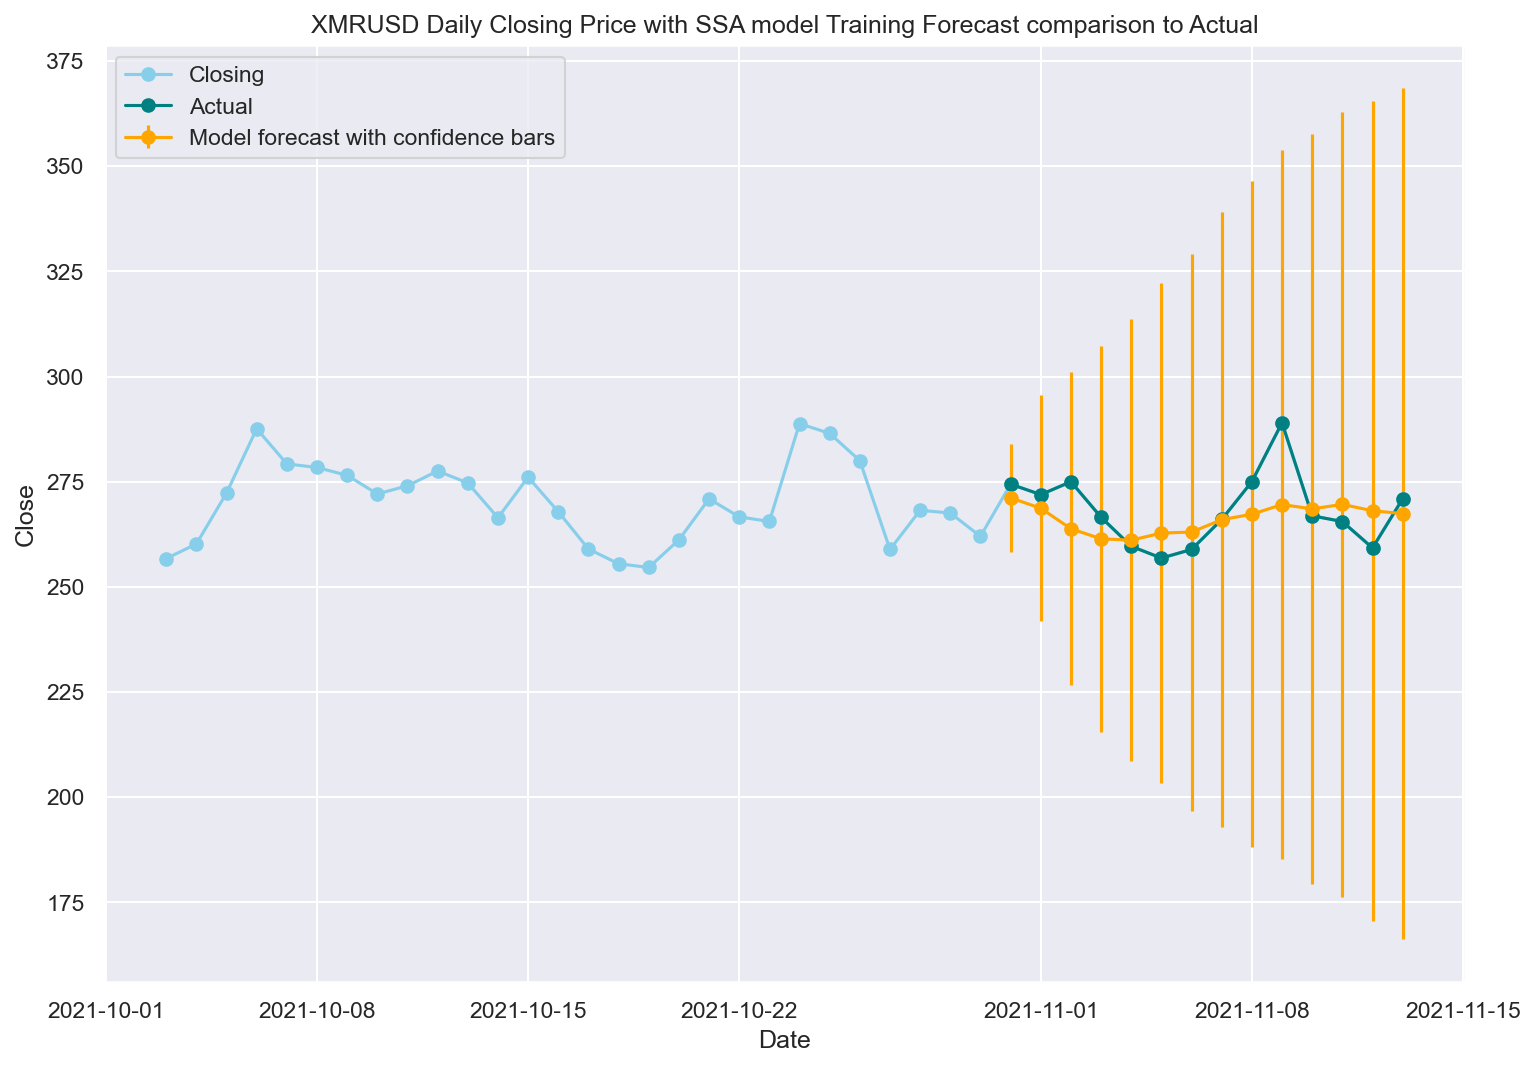

In [141]:

plt.title(f"{currency} Daily Closing Price with SSA model Training Forecast comparison to Actual")
plt.plot('Date', 'Last', data=traindf.tail(3*len(testdf)), color="skyblue", marker='o', label="Closing")
plt.plot('Date', 'Last', data=testdf, marker='o', color='teal', label="Actual")
plt.errorbar('Date', 'Forecast', data=train_fc_df, marker='o', color='orange', label='Model forecast with confidence bars', yerr=train_fc_df["BoundsDifference"])
plt.legend(loc='upper left')
plt.ylabel("Close")
plt.xlabel("Date")
plt.savefig(datadir.parent / "Graphs" / f'{currency}_training_forecast_{today}.png')
plt.show()

         Date   Forecast  LowerBound  UpperBound  BoundsDifference
0  2021-11-15  278.27087   265.42816   291.11360         12.842712
1  2021-11-16  284.93790   258.12152   311.75427         26.816376
2  2021-11-17  282.76930   245.53462   320.00397         37.234673
3  2021-11-18  282.19840   236.31973   328.07706         45.878662
4  2021-11-19  283.05273   230.44882   335.65665         52.603912
5  2021-11-20  288.64697   229.28893   348.00504         59.358055
6  2021-11-21  291.43640   225.21373   357.65906         66.222664
7  2021-11-22  289.75120   216.62968   362.87270         73.121513
8  2021-11-23  285.93536   206.78484   365.08590         79.150536
9  2021-11-24  282.86664   198.56512   367.16815         84.301514
10 2021-11-25  284.57860   195.50592   373.65130         89.072693
11 2021-11-26  285.94806   192.60160   379.29453         93.346466
12 2021-11-27  291.24484   193.79040   388.69928         97.454437
13 2021-11-28  291.26465   190.05269   392.47660        101.21

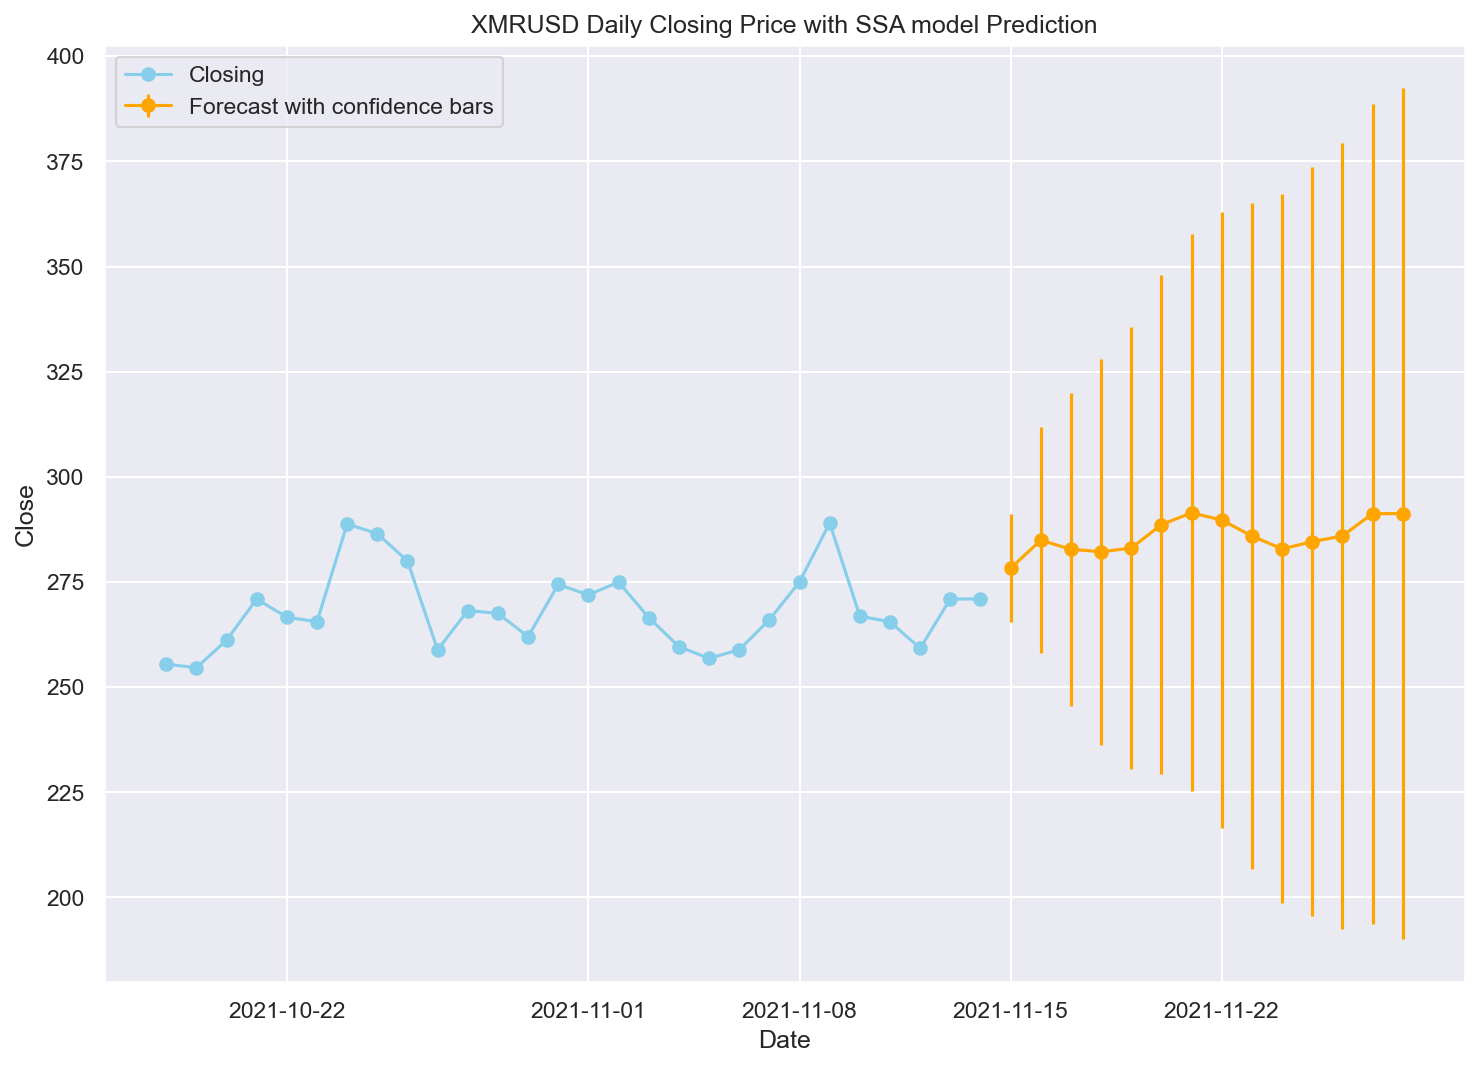

In [142]:

predict_dataset_file = datadir / f"{currency}_prediction_dataset.csv"
predict_forecast_file = datadir / f"{currency}_prediction_forecast.csv"
# import math
# pr_df = pd.read_csv(predict_dataset_file)
# print(pr_df)
# pr_df["Last"] = pr_df["Last"].apply(lambda x: math.log(x))
# pr_df.to_csv(predict_dataset_file, index=None)

if (predict_dataset_file.is_file() and predict_forecast_file.is_file()):
    predict_df = pd.read_csv(predict_dataset_file, parse_dates=['Date'], date_parser=dateparse)
    predict_fc_df = pd.read_csv(predict_forecast_file, parse_dates=['Date'], date_parser=dateparse)
    print(predict_fc_df)
    # Only keep two columns, and reverse the dataset (old to new)
    predict_df = predict_df[["Date", "Last"]][::-1]

    plt.title(f"{currency} Daily Closing Price with SSA model Prediction")
    plt.errorbar('Date', 'Forecast', data=predict_fc_df, marker='o', color='orange', label='Forecast with confidence bars', yerr=predict_fc_df["BoundsDifference"])
    plt.plot('Date', 'Last', data=predict_df.tail(2*len(predict_fc_df)), color="skyblue", marker='o', label="Closing")
    plt.legend(loc='upper left')
    plt.ylabel("Close")
    plt.xlabel("Date")
    plt.savefig(datadir.parent / "Graphs" / f'{currency}_prediction_{today}.png')
    plt.show()
